Build the Friendship Graph, calculating the Influences

In [1]:
# from utils.friendship import GraphBuilder
# import pickle
# import os
# from os.path import join

# ### Test
# user = 'user.json'
# data_dir = 'data/raw'

# # Sample 10 entries from the json file
# fields = ['user_id','friends']
# n_samples = 120000
# G = GraphBuilder(user, data_dir).build_graph(n_samples, calculate_influence = True)

# home = os.path.expanduser('~')
# pkl = join(home, 'data/pkl/friendship.pkl')
# with open(pkl, 'wb') as f:
#     pickle.dump(G, f)

Map the business ids to names, for plotting purpose

In [2]:
# import pickle

# with open('./data/business_doc', 'rb') as f:
#     doc_business = pickle.load(f)

# from utils.preprocess import JSONLoader
# city = ['Toronto']
# categories = ['Burgers','Seafood','Italian','Chinese','Japanese']
# business = 'business.json'
# fields = ['business_id', 'name']
# jl = JSONLoader(business, 'data/raw', fields = fields)
# jl.set_condition(city=city, categories=categories, business_id = doc_business.keys())
# f, b = jl.sample(10000000)
# bid2name = dict(b)

# import pickle
# with open('./data/bid2name', 'wb') as f:
#     pickle.dump(bid2name, f)

Load the user influence information and reviews

In [1]:
import pickle
import os
from os.path import join

home = os.path.expanduser('~')
pkl = join(home, 'data/pkl/friendship.pkl')
with open(pkl, 'rb') as f:
    G = pickle.load(f)
    
import utils.wordnet as wordnet

data_raw = 'data/raw'
docs = wordnet.load_reviews(data_raw)

The number of businesses: 2051


Make recommendations

In [2]:
from utils.recommender import Recommender

user_id = max(G.nodes(), key = lambda x: G.degree(x))
user_xy = (43.6744092, -79.4580342)
data_raw = 'data/raw'
data_pkl = 'data/pkl'
r = Recommender(data_raw, data_pkl, user_id, user_xy, G)

User id: ZIOCmdFaMIF56FR-nWr_2A
User location: (43.674,-79.458)
The number of popular friends: 8350
The number of restaurants: 2051


# Visualization

In [3]:
from utils.viz import scatterplot
import utils.wordnet as wordnet

cats = ['Seafood', 'Burgers', 'Chinese', 'Japanese', 'Italian']
wc = wordnet.WCloud(docs)

The number of recommendations: 16


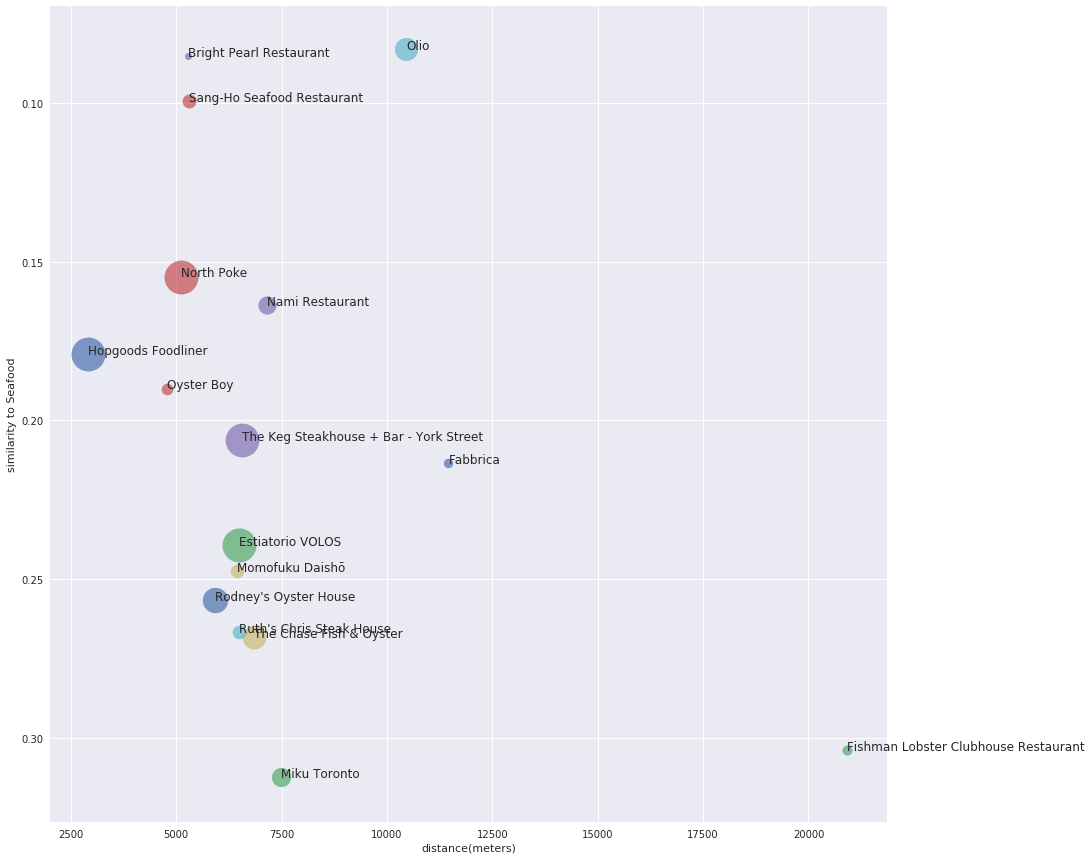

The number of recommendations: 12


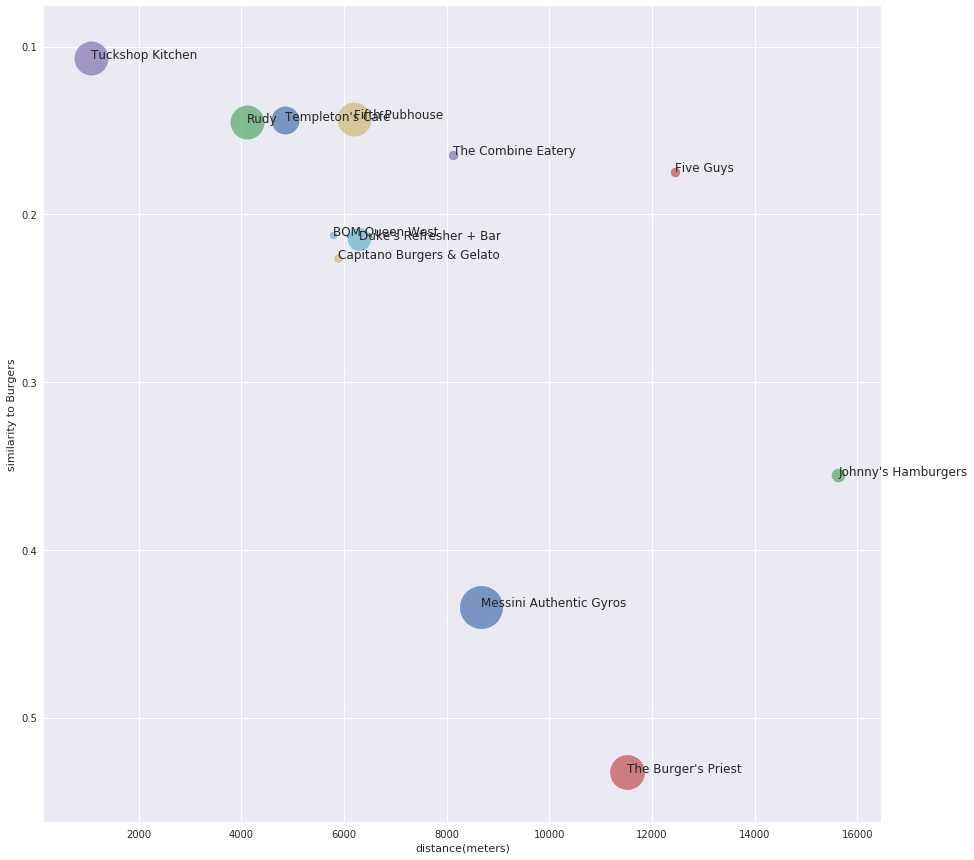

The number of recommendations: 16


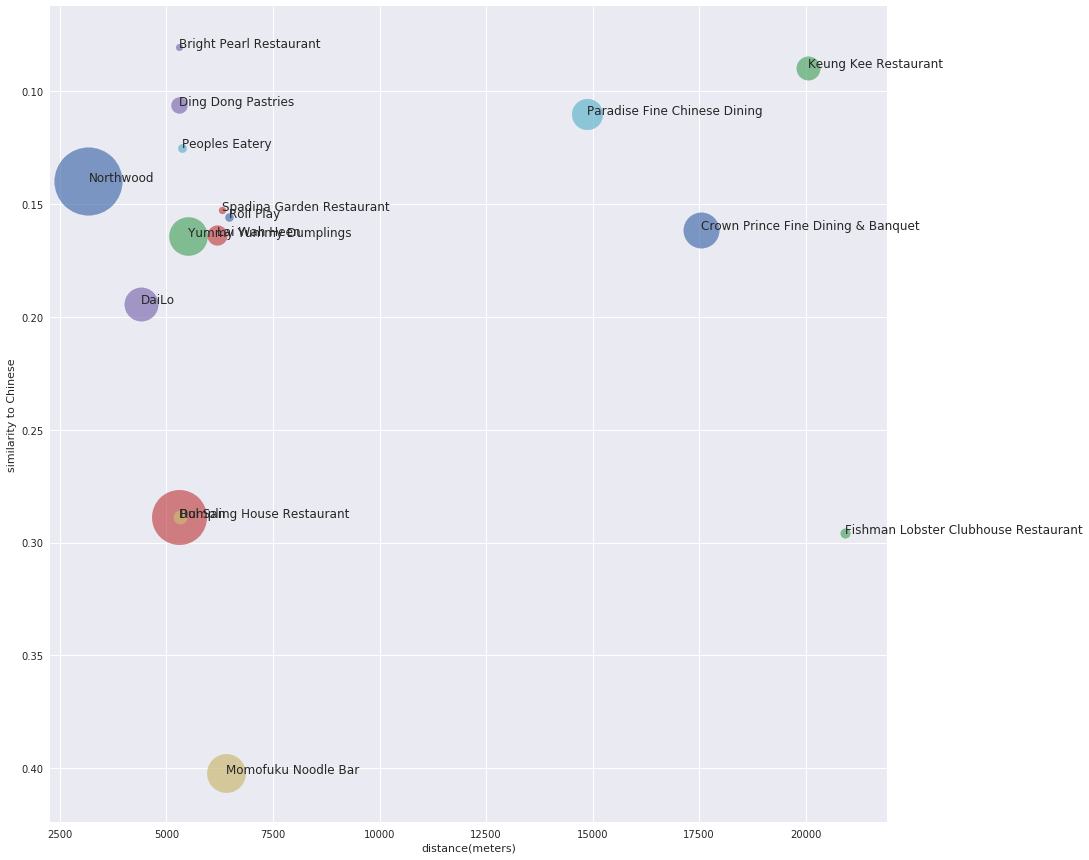

The number of recommendations: 34


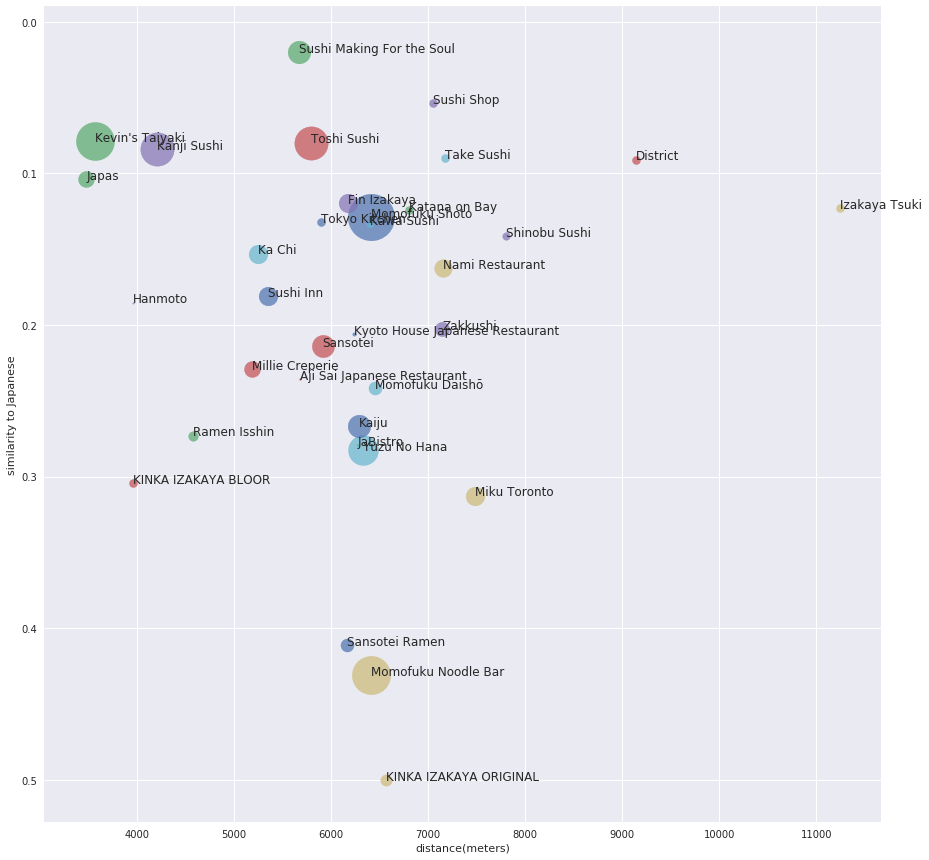

The number of recommendations: 34


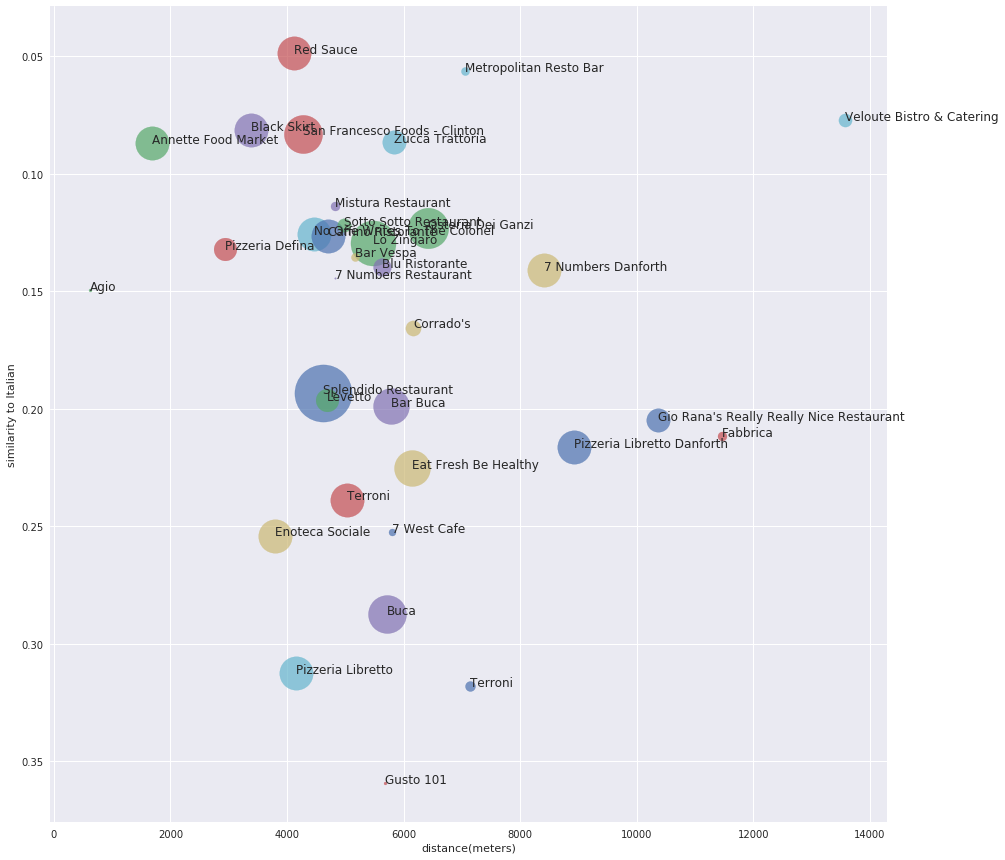

In [5]:
# Takes long
for cat in cats:
    cat, ps, att, loc = r.recommend(cat)
    scatterplot(cat, ps, att, loc)
    for bid in loc:
        try:
            wc.process(bid)
            wc.draw(show=False)
        except ValueError:
            continue

# Find the image filename that you want

In [6]:
with open('./data/bid2name', 'rb') as f:
    bid2name = pickle.load(f)
name2bid = dict([(value,key) for key,value in bid2name.items()])

In [10]:
def get_image_name(bname):
    names = []
    types = ['price','food','atmosphere','staff']
    for type in types:
        name = 'wordcloud_%s_%s.png' % (name2bid[bname], type)
        names.append(name)
    
    return names

get_image_name('Buca')

['wordcloud_A7waf6G3cvnLfAqKeLL8DA_price.png',
 'wordcloud_A7waf6G3cvnLfAqKeLL8DA_food.png',
 'wordcloud_A7waf6G3cvnLfAqKeLL8DA_atmosphere.png',
 'wordcloud_A7waf6G3cvnLfAqKeLL8DA_staff.png']

# Word Cloud visualization

single example

In [2]:
import utils.wordnet as wordnet

data_raw = 'data/raw'
docs = wordnet.load_reviews(data_raw)

The number of businesses: 2051


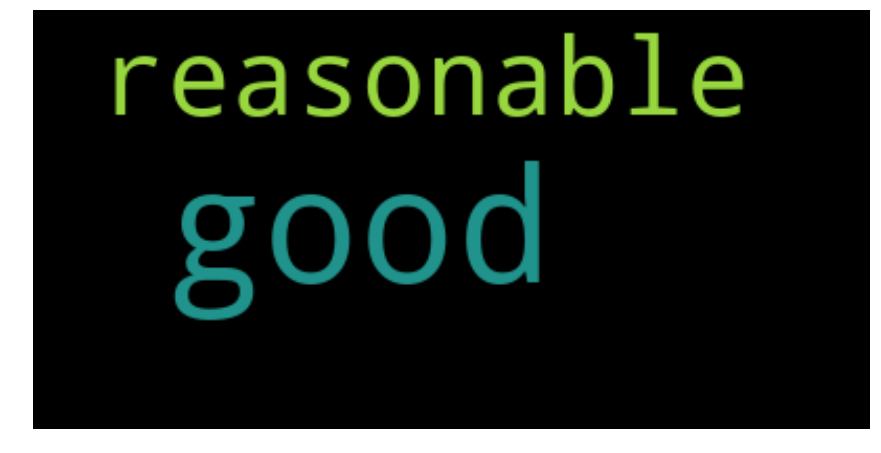

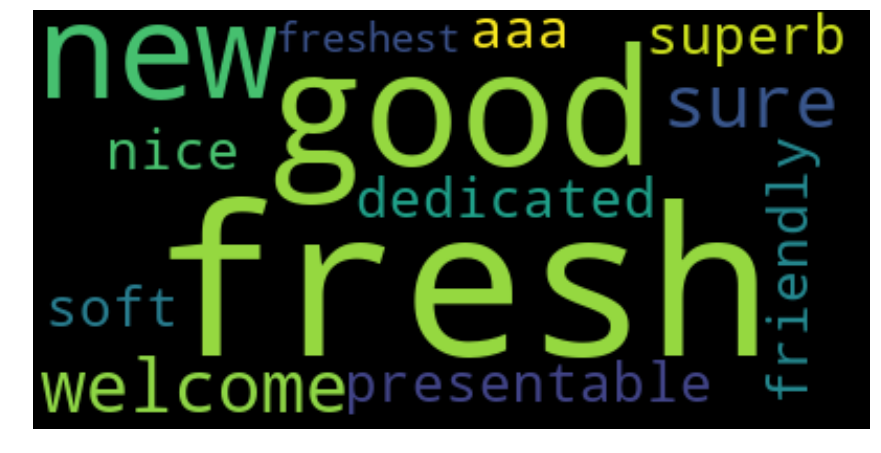

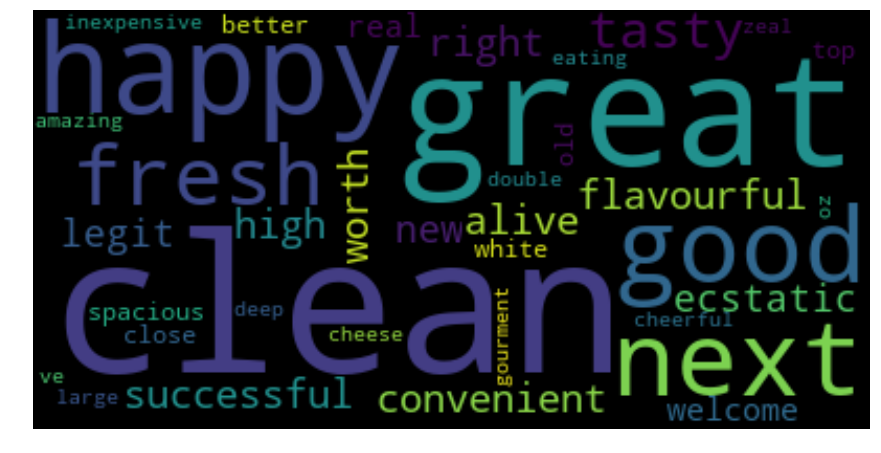

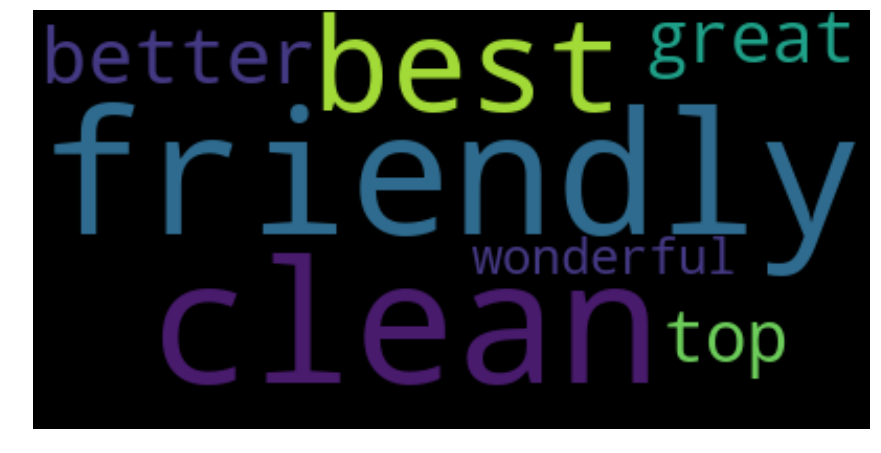

In [3]:
wc = wordnet.WCloud(docs)
wc.process(bid='JB8-8TtNYX-vLqN7cz-zHA')
wc.draw(show=True)